<a href="https://colab.research.google.com/github/Umesh9045/DSBDA/blob/master/2_DSBDA_DataWrangling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import pandas as pd
import numpy as np

In [178]:
df = pd.read_csv("/content/StudentsPerformanceTest.csv")

In [179]:
df.head()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,Mumbai
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Nashik
4,male,na,78,75.0,81.0,3,Pune


In [180]:
df.tail()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,Mumbai
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,Pune


In [181]:
df.describe()

,writing score,Placement Score,placement offer count
count,8.000000,8.000000,9.000000
mean,77.000000,62.125000,1.777778
std,13.416408,23.295846,1.201850
min,52.000000,12.000000,0.000000
25%,72.250000,53.500000,1.000000
50%,76.500000,72.000000,2.000000
75%,88.250000,78.000000,2.000000
max,93.000000,81.000000,4.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 9 non-null      object 
 1   math score             8 non-null      object 
 2   reading score          9 non-null      object 
 3   writing score          8 non-null      float64
 4   Placement Score        8 non-null      float64
 5   placement offer count  9 non-null      int64  
 6   Region                 9 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [183]:
df.isnull()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False


In [184]:
df.isnull().sum()

gender                   0
math score               1
reading score            0
writing score            1
Placement Score          1
placement offer count    0
Region                   0
dtype: int64

In [185]:
df['math score'] = df['math score'].replace(np.nan, df['math score'].mean)

In [186]:
df['writing score'] = df['writing score'].replace(np.nan, df['writing score'].mean)

In [187]:
df['Placement Score'] = df['Placement Score'].fillna(df['Placement Score'].mean())

In [188]:
df.isnull().sum()

gender                   0
math score               0
reading score            0
writing score            0
Placement Score          0
placement offer count    0
Region                   0
dtype: int64

# OUTLIRE

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
demo = pd.read_csv('/content/demo1.csv')

In [191]:
demo.isnull().sum()

math score        0
club join year    0
dtype: int64

<Axes: >

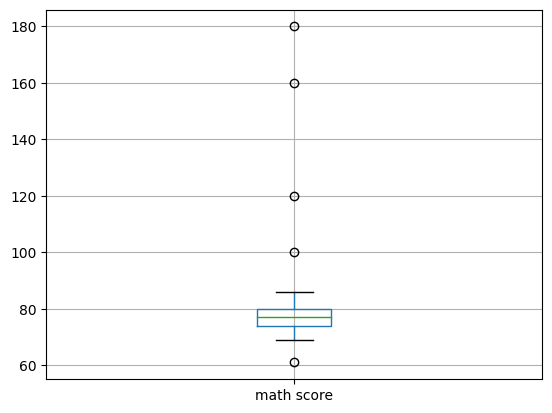

In [192]:
#BOX PLOT
demo.boxplot('math score')

In [193]:
q1 = np.percentile(demo['math score'],25)
q2 = np.percentile(demo['math score'],50)
q3 = np.percentile(demo['math score'],75)
print(q1,q2,q3)

74.0 77.0 80.0


In [194]:
IQR = q3-q1

In [195]:
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)

print(lower_bound, upper_bound)

65.0 89.0


In [198]:
new_df = demo[(demo['math score']>lower_bound) & (demo['math score']<upper_bound) ]

<Axes: >

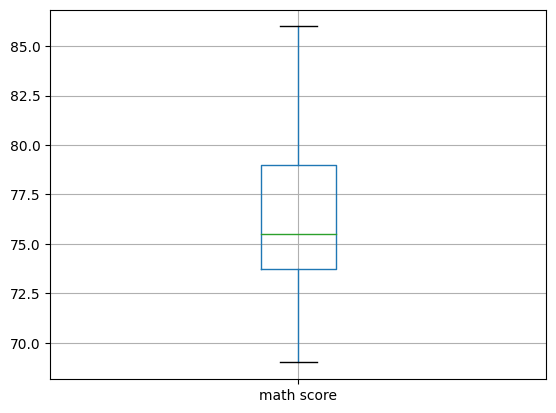

In [200]:
new_df.boxplot('math score')

#Data Transformation

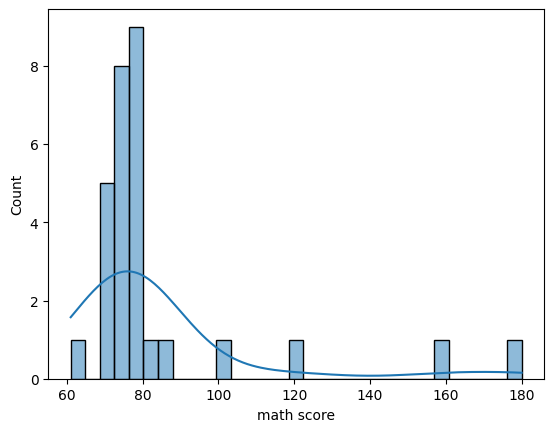

In [210]:
sns.histplot(demo['math score'] ,kde=True)
plt.show()
#negatively skewed